In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [48]:
data_path = '../data/processed/'

x_test_section_2 = np.load(data_path + 'x_test_section_96.npy')
y_test_section_2 = np.load(data_path + 'y_test_section_96.npy')

In [49]:
x_test_section_2.shape

(928, 2656, 6)

In [50]:
#cmap = cm.cool
cmap_reversed = cm.get_cmap('RdBu')

## Expected values

In [51]:
background_list = ['not_karstified',
                   'balanced', 
                   'karstified']

data_path = '../xai/results/'

i = 0
for j in range(3):
  background_type = background_list[j]
  expected_value = np.round(np.load(data_path + f'expected_value-{background_type}.npy').reshape(16, 16), 2)
  print(f'Min: {expected_value.min()}, Max: {expected_value.max()}, ')

Min: 0.30000001192092896, Max: 0.3499999940395355, 
Min: 0.6100000143051147, Max: 0.6700000166893005, 
Min: 0.8199999928474426, Max: 0.8500000238418579, 


In [52]:
selected_features = [0, 1, 2, 3, 4, 5] 

for feature in selected_features:
  background_type = background_list[1]
  expected_value = np.round(np.load(data_path + f'expected_value-{background_type}_only{feature}.npy').reshape(16, 16), 2)
  print(f'Feature number {feature} - Min: {expected_value.min()}, Max: {expected_value.max()}, ')

Feature number 0 - Min: 0.699999988079071, Max: 0.7599999904632568, 
Feature number 1 - Min: 0.7799999713897705, Max: 0.8100000023841858, 
Feature number 2 - Min: 0.75, Max: 0.8299999833106995, 
Feature number 3 - Min: 0.6200000047683716, Max: 0.6399999856948853, 
Feature number 4 - Min: 0.7099999785423279, Max: 0.7300000190734863, 
Feature number 5 - Min: 0.7099999785423279, Max: 0.7599999904632568, 


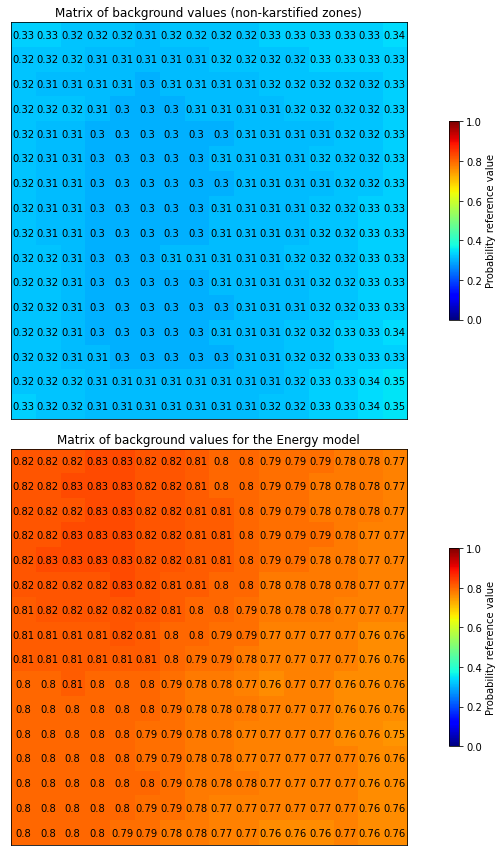

In [53]:
fig, ax = plt.subplots(2, 1, figsize = (12, 12))
background_list = ['not_karstified',
                   'balanced', 
                   'distribution']
background_type = background_list[0]
expected_value = np.round(np.load(data_path + f'expected_value-{background_type}.npy').reshape(16, 16), 2)

im = ax[0].matshow(expected_value, cmap = 'jet', vmin = 0, vmax = 1)
for a in range(16):
  for b in range(16):
      text = ax[0].text(a, b,
                     expected_value[b, a],
                     va='center', ha='center'
                     )

ax[0].set_title('Matrix of background values (non-karstified zones)')

fig.colorbar(im, 
             ax=ax[0],
              #anchor=(0, 0.3),
             shrink=0.5,
             fraction = 0.20,
             use_gridspec=True,
             label = 'Probability reference value'
             )

background_type = background_list[1]
feature = 2
expected_value = np.round(np.load(data_path + f'expected_value-{background_type}_only{feature}.npy').reshape(16, 16), 2)

im = ax[1].matshow(expected_value, cmap = 'jet', vmin = 0, vmax = 1)
for a in range(16):
  for b in range(16):
      text = ax[1].text(a, b,
                     expected_value[b, a],
                     va='center', ha='center'
                     )

ax[1].set_title('Matrix of background values for the Energy model')

fig.colorbar(im, 
              ax=ax[1],
              #anchor=(0, 0.3),
             shrink=0.5,
             fraction = 0.20,
             use_gridspec=True,
             label = 'Probability reference value'
             )
for axi in ax:
  axi.set_yticks([])
  axi.set_xticks([])


fig.tight_layout()
output_path = '../xai/figures/'
fig.savefig(output_path + 'expectedvaluesfigure.png', dpi = 300)

## Figures without attributes

In [54]:
def figure_without_attributes(background_type, current,
                              vmin = -1, vmax = 1):

  approximation_full = np.load(data_path + f'approximation_full_{current}-{background_type}.npy')
  channel_contribution_full = np.load(data_path + f'channel_contribution_full_{current}-{background_type}.npy', )
  x_predicted_full = np.load(data_path + f'x_predicted_full_{current}-{background_type}.npy', )
  expected_value = np.load(data_path + f'expected_value-{background_type}.npy')

  x_test_section_2 = np.load(data_path + f'x_test_area_{current}.npy').astype(np.float16)
  selected_features = [0, 1, 2, 3, 4, 5] 
  x_test_section_2 = x_test_section_2[..., selected_features]
  y_test_section_2 = np.load(data_path + f'y_test_area_{current}.npy').astype(np.float16)

  channel_list = ['GPR Section', 'Similarity', 'Energy', 'Instantaneous Frequency', 'Instantaneous Phase', 'Hilbert Trace / Similarity']

  fig, ax = plt.subplots(4, 2, figsize = (6, 10))

  # im = ax[0, 0].imshow(x_predicted_full[..., 0], cmap = 'jet', vmin = 0, vmax = 1)
  im = ax[0, 0].imshow(y_test_section_2.astype(np.float32), cmap = 'gray', vmin = 0, vmax = 1)
  cbar = fig.colorbar(im, ax=ax[0, 0],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[0, 0].set_title('Ground Truth')

  # ax[0, 1].imshow(approximation_full, cmap = 'jet', vmin = 0, vmax = 1)
  im = ax[0, 1].imshow(x_predicted_full[..., 0], cmap = 'jet', vmin = 0, vmax = 1)
  im = fig.colorbar(im, ax=ax[0, 1],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[0, 1].set_title('Predicted Karstified\nZones probability')

  ax[0, 0].set_xticks([])
  ax[0, 0].set_yticks([])
  ax[0, 1].set_xticks([])
  ax[0, 1].set_yticks([])

  channel_list = ['GPR Section', 'Similarity', 'Energy', 'Instantaneous Frequency', 'Instantaneous Phase', 'Hilbert Trace / Similarity']

  channel = 0
  for i in range(1, 4):
    for j in range(0, 2):
      im = ax[i, j].imshow(channel_contribution_full[..., channel], cmap = cmap_reversed, vmin = vmin, vmax = vmax)
      cbar = fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
      cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
      ax[i, j].set_title(f'{channel_list[channel]}\ncontribution')
      ax[i, j].set_xticks([])
      ax[i, j].set_yticks([])
      channel += 1


  plt.figtext(0.00, 0.95, 'A)', fontsize=12)
  plt.figtext(0.50, 0.95, 'B)', fontsize=12)
  plt.figtext(0.00, 0.70, 'C)', fontsize=12)
  plt.figtext(0.50, 0.70, 'D)', fontsize=12)
  plt.figtext(0.00, 0.45, 'E)', fontsize=12)
  plt.figtext(0.50, 0.45, 'F)', fontsize=12)
  plt.figtext(0.00, 0.20, 'G)', fontsize=12)
  plt.figtext(0.50, 0.20, 'H)', fontsize=12)

  fig.tight_layout()

In [55]:
# vmin, vmax = -1, 1
vmin, vmax = -0.5, 0.5

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


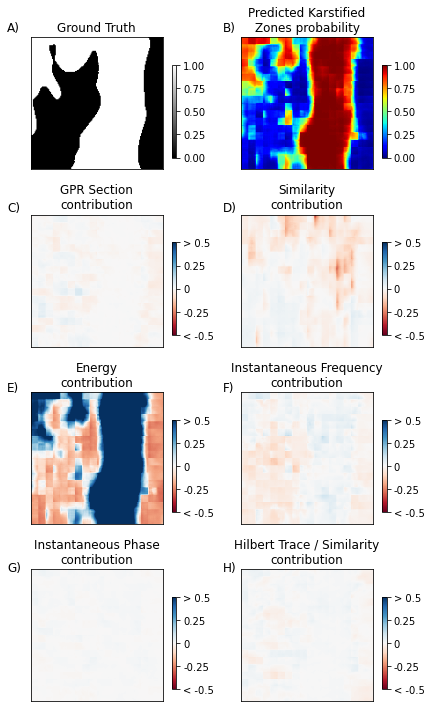

In [56]:
figure_without_attributes(background_type = 'not_karstified',
                          current = 'a',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


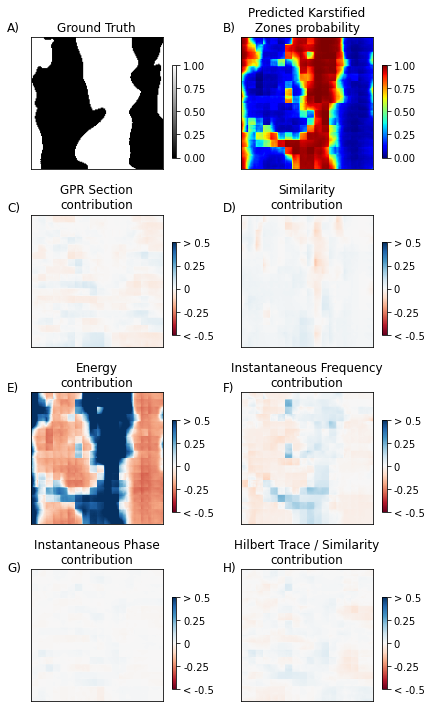

In [57]:
figure_without_attributes(background_type = 'not_karstified',
                          current = 'b',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


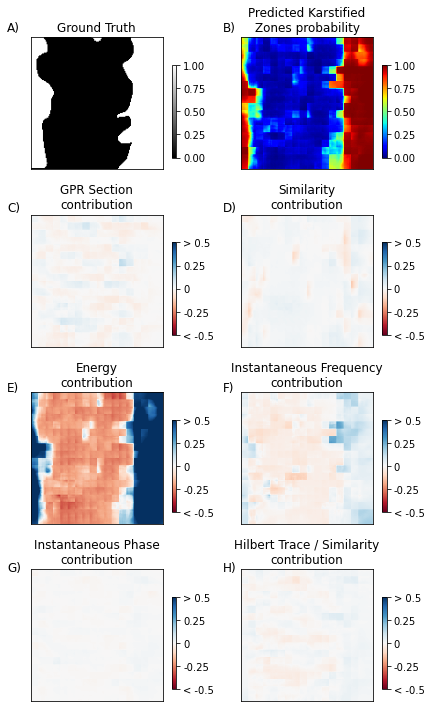

In [58]:
figure_without_attributes(background_type = 'not_karstified',
                          current = 'c',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


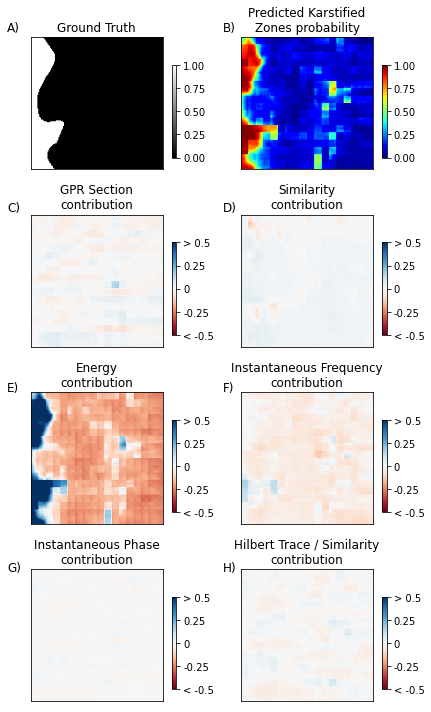

In [59]:
figure_without_attributes(background_type = 'not_karstified',
                          current = 'd',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


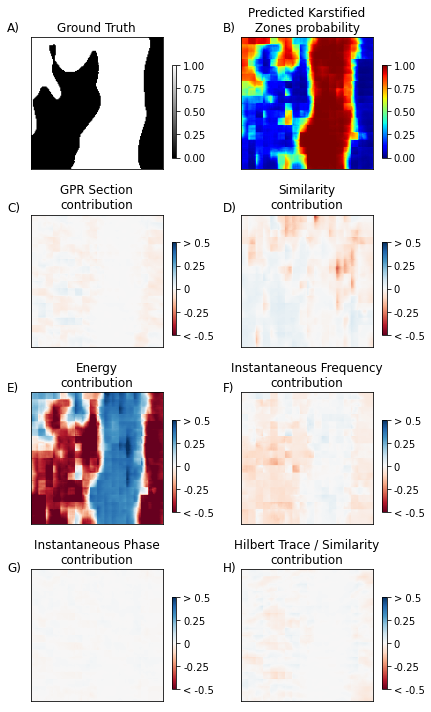

In [60]:
figure_without_attributes(background_type = 'balanced',
                          current = 'a',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


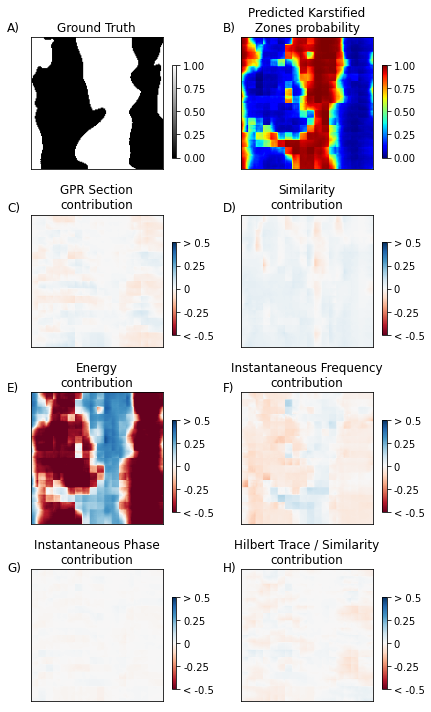

In [61]:
figure_without_attributes(background_type = 'balanced',
                          current = 'b',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


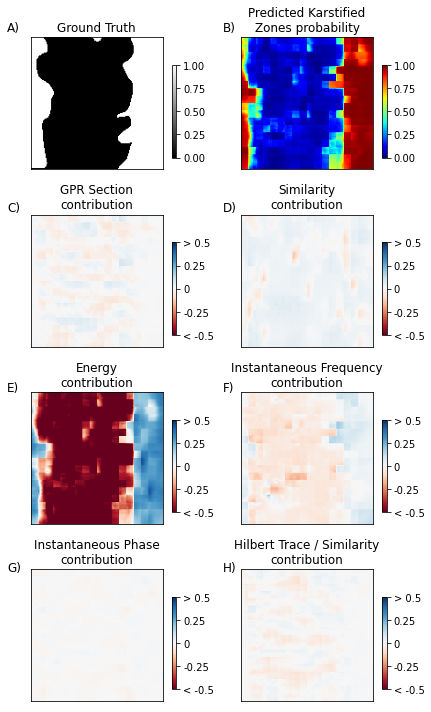

In [62]:
figure_without_attributes(background_type = 'balanced',
                          current = 'c',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


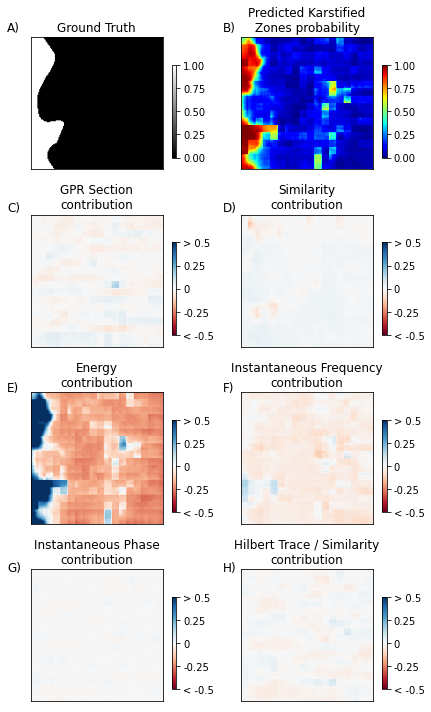

In [63]:
figure_without_attributes(background_type = 'balanced',
                          current = 'd',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


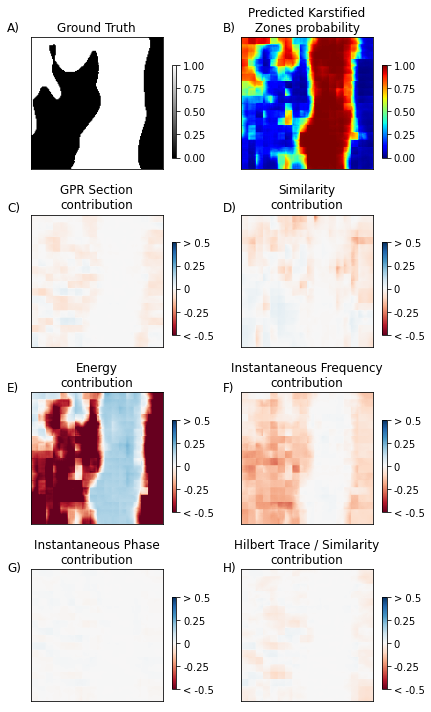

In [64]:
figure_without_attributes(background_type = 'karstified',
                          current = 'a',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


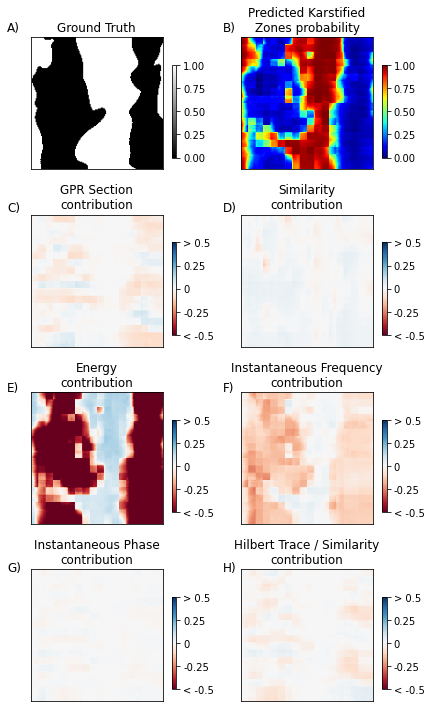

In [65]:
figure_without_attributes(background_type = 'karstified',
                          current = 'b',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


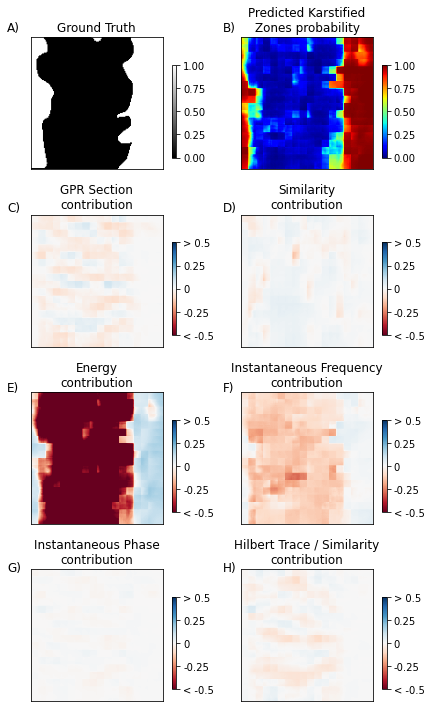

In [66]:
figure_without_attributes(background_type = 'karstified',
                          current = 'c',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-54-1133a5c5f73f>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


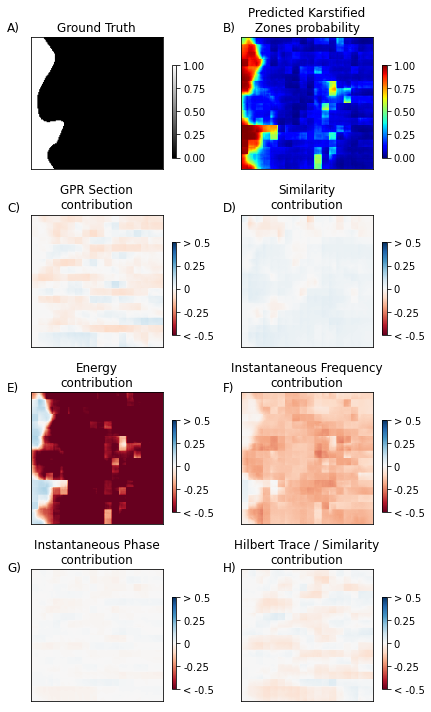

In [67]:
figure_without_attributes(background_type = 'karstified',
                          current = 'd',
                          vmin = vmin,
                          vmax = vmax)

## Figures with attributes

In [68]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

In [69]:
cmap_list = [
             'gray', #GPR Section
             'gray', #Similarity
             'Reds', #Energy
             'seismic', #Inst Frequency
             'seismic', #Inst Phase
             grayscale_cmap('RdBu'), #Hilb/Sim             
]

In [70]:
def figure_with_attributes(background_type, current,
                              vmin = -1, vmax = 1):

  approximation_full = np.load(data_path + f'approximation_full_{current}-{background_type}.npy')
  channel_contribution_full = np.load(data_path + f'channel_contribution_full_{current}-{background_type}.npy', )
  x_predicted_full = np.load(data_path + f'x_predicted_full_{current}-{background_type}.npy', )
  expected_value = np.load(data_path + f'expected_value-{background_type}.npy')

  x_test_section_2 = np.load(data_path + f'x_test_area_{current}.npy').astype(np.float16)
  selected_features = [0, 1, 2, 3, 4, 5] 
  x_test_section_2 = x_test_section_2[..., selected_features]
  y_test_section_2 = np.load(data_path + f'y_test_area_{current}.npy').astype(np.float16)

  fig, ax = plt.subplots(4, 4, figsize = (12, 10))

  ax[3, 2].remove()
  ax[3, 3].remove()

  channel_list = ['GPR Section', 'Similarity', 'Energy', 'Instantaneous\nFrequency', 'Instantaneous Phase', 'Hilbert Trace /\nSimilarity']

  #Ground Truth
  im = ax[0, 0].imshow(y_test_section_2.astype(np.float32), cmap = 'gray', vmin = 0, vmax = 1)
  fig.colorbar(im, ax=ax[0, 0],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[0, 0].set_title('Ground Truth')
  ax[0, 0].set_xticks([])
  ax[0, 0].set_yticks([])

  #Predictions

  im = ax[0, 1].imshow(x_predicted_full[..., 0], cmap = 'jet', vmin = 0, vmax = 1)
  cbar = fig.colorbar(im, ax=ax[0, 1],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[0, 1].set_title('Predicted Karstified\nZones probability')
  ax[0, 1].set_xticks([])
  ax[0, 1].set_yticks([])

  # GPR Section attribute and contribution
  channel = 0
  i, j = 0, 2
  im = ax[i, j].imshow(x_test_section_2[..., channel].astype(np.float32),
                       cmap = cmap_list[channel],
                      #vmin = 0,
                      #vmax = 1
                      )
  cbar = fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[i, j].set_title(f'{channel_list[channel]}')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  i, j = 0, 3
  im = ax[i, j].imshow(channel_contribution_full[..., channel],
                        cmap = cmap_reversed,
                        vmin = vmin, vmax = vmax,
                        #alpha = 0.3
                        )

  cbar = fig.colorbar(im, ax=ax[i, j],
                #location = 'bottom',
                anchor=(0, 0.3),
                shrink=0.7,
                use_gridspec=True)
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
  ax[i, j].set_title(f'{channel_list[channel]}\ncontribution')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  # Similarity
  channel = 1
  i, j = 1, 0
  im = ax[i, j].imshow(x_test_section_2[..., channel].astype(np.float32),
                       cmap = cmap_list[channel],
                      #vmin = 0,
                      #vmax = 1
                      )
  fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[i, j].set_title(f'{channel_list[channel]}')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  i, j = 1, 1
  im = ax[i, j].imshow(channel_contribution_full[..., channel],
                        cmap = cmap_reversed,
                        vmin = vmin, vmax = vmax,
                        #alpha = 0.3
                        )

  cbar = fig.colorbar(im, ax=ax[i, j],
                #location = 'bottom',
                anchor=(0, 0.3),
                shrink=0.7,
                use_gridspec=True)
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
  ax[i, j].set_title(f'{channel_list[channel]}\ncontribution')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  # Energy
  channel = 2
  i, j = 1, 2
  im = ax[i, j].imshow(x_test_section_2[..., channel].astype(np.float32),
                       cmap = cmap_list[channel],
                      #vmin = 0,
                      #vmax = 1
                      )
  fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[i, j].set_title(f'{channel_list[channel]}')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  i, j = 1, 3
  im = ax[i, j].imshow(channel_contribution_full[..., channel],
                        cmap = cmap_reversed,
                        vmin = vmin, vmax = vmax,
                        #alpha = 0.3
                        )

  cbar = fig.colorbar(im, ax=ax[i, j],
                #location = 'bottom',
                anchor=(0, 0.3),
                shrink=0.7,
                use_gridspec=True)
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
  ax[i, j].set_title(f'{channel_list[channel]}\ncontribution')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  # Instantaneous Frequency
  channel = 3
  i, j = 2, 0
  im = ax[i, j].imshow(x_test_section_2[..., channel].astype(np.float32),
                       cmap = cmap_list[channel],
                      #vmin = 0,
                      #vmax = 1
                      )
  fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[i, j].set_title(f'{channel_list[channel]}')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  i, j = 2, 1
  im = ax[i, j].imshow(channel_contribution_full[..., channel],
                        cmap = cmap_reversed,
                        vmin = vmin, vmax = vmax,
                        #alpha = 0.3
                        )

  cbar = fig.colorbar(im, ax=ax[i, j],
                #location = 'bottom',
                anchor=(0, 0.3),
                shrink=0.7,
                use_gridspec=True)
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
  ax[i, j].set_title(f'{channel_list[channel]}\ncontribution')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  # Instantaneous Phase
  channel = 4
  i, j = 2, 2
  im = ax[i, j].imshow(x_test_section_2[..., channel].astype(np.float32),
                       cmap = cmap_list[channel],
                      #vmin = 0,
                      #vmax = 1
                      )
  im = fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[i, j].set_title(f'{channel_list[channel]}')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  i, j = 2, 3
  im = ax[i, j].imshow(channel_contribution_full[..., channel],
                        cmap = cmap_reversed,
                        vmin = vmin, vmax = vmax,
                        #alpha = 0.3
                        )

  cbar = fig.colorbar(im, ax=ax[i, j],
                #location = 'bottom',
                anchor=(0, 0.3),
                shrink=0.7,
                use_gridspec=True)
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
  ax[i, j].set_title(f'{channel_list[channel]}\ncontribution')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  # Hilbert Trace/Similarity
  channel = 5
  i, j = 3, 0
  im = ax[i, j].imshow(x_test_section_2[..., channel].astype(np.float32),
                       cmap = cmap_list[channel],
                      #vmin = 0,
                      #vmax = 1
                      )
  fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[i, j].set_title(f'{channel_list[channel]}')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  i, j = 3, 1
  im = ax[i, j].imshow(channel_contribution_full[..., channel],
                        cmap = cmap_reversed,
                        vmin = vmin, vmax = vmax,
                        #alpha = 0.3
                        )

  cbar = fig.colorbar(im, ax=ax[i, j],
                #location = 'bottom',
                anchor=(0, 0.3),
                shrink=0.7,
                use_gridspec=True)
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
  ax[i, j].set_title(f'{channel_list[channel]}\ncontribution')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])
  size = 12 * 1
  plt.figtext(0.02, 0.96, 'A)', fontsize=size)
  plt.figtext(0.25, 0.96, 'B)', fontsize=size)
  plt.figtext(0.50, 0.96, 'C)', fontsize=size)
  plt.figtext(0.75, 0.96, 'D)', fontsize=size)
  plt.figtext(0.02, 0.70, 'E)', fontsize=size)
  plt.figtext(0.25, 0.70, 'F)', fontsize=size)
  plt.figtext(0.50, 0.70, 'G)', fontsize=size)
  plt.figtext(0.75, 0.70, 'H)', fontsize=size)
  plt.figtext(0.02, 0.45, 'I)', fontsize=size)
  plt.figtext(0.25, 0.45, 'J)', fontsize=size)
  plt.figtext(0.50, 0.45, 'K)', fontsize=size)
  plt.figtext(0.75, 0.45, 'L)', fontsize=size)
  plt.figtext(0.02, 0.20, 'M)', fontsize=size)
  plt.figtext(0.25, 0.20, 'N)', fontsize=size)


  fig.tight_layout()
    
  output_path = '../xai/figures/'
  fig.savefig(f'{output_path + background_type}-{current}.png', dpi = 300)

In [71]:
vmin, vmax = -0.5, 0.5

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

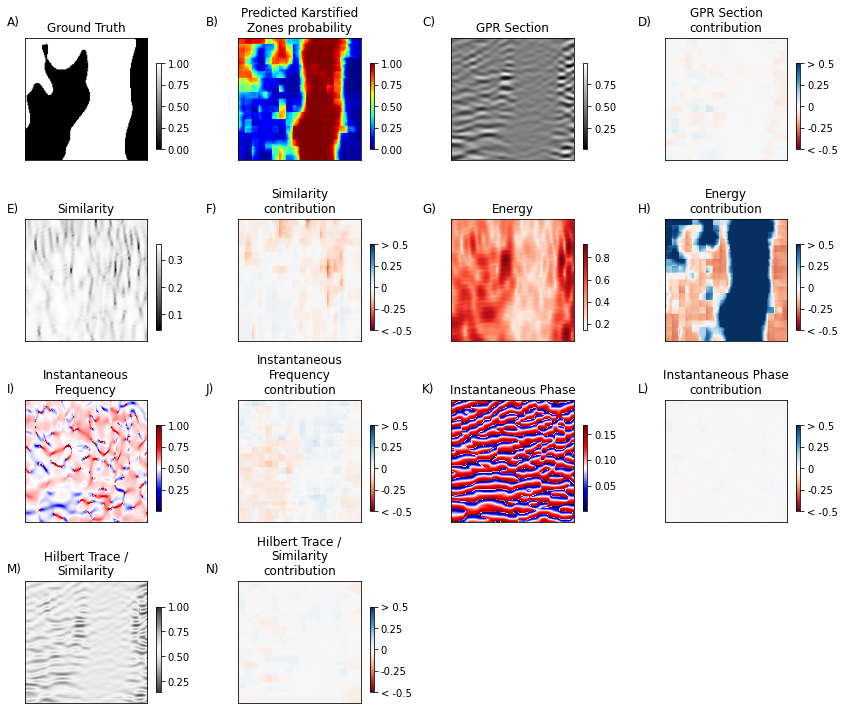

In [72]:
figure_with_attributes(background_type = 'not_karstified',
                       current = 'a',
                        vmin = vmin,
                        vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

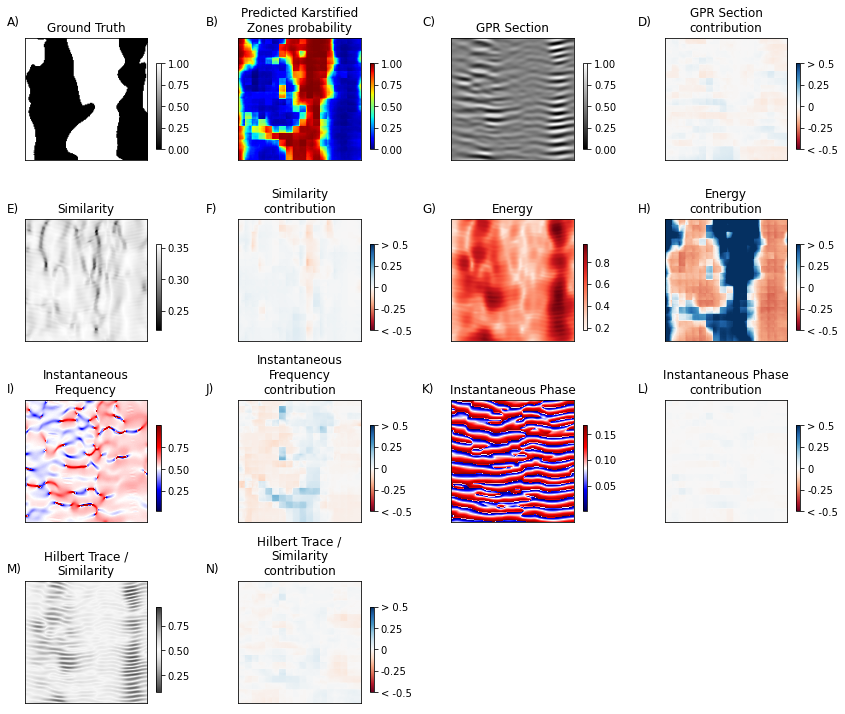

In [73]:
figure_with_attributes(background_type = 'not_karstified',
                       current = 'b',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

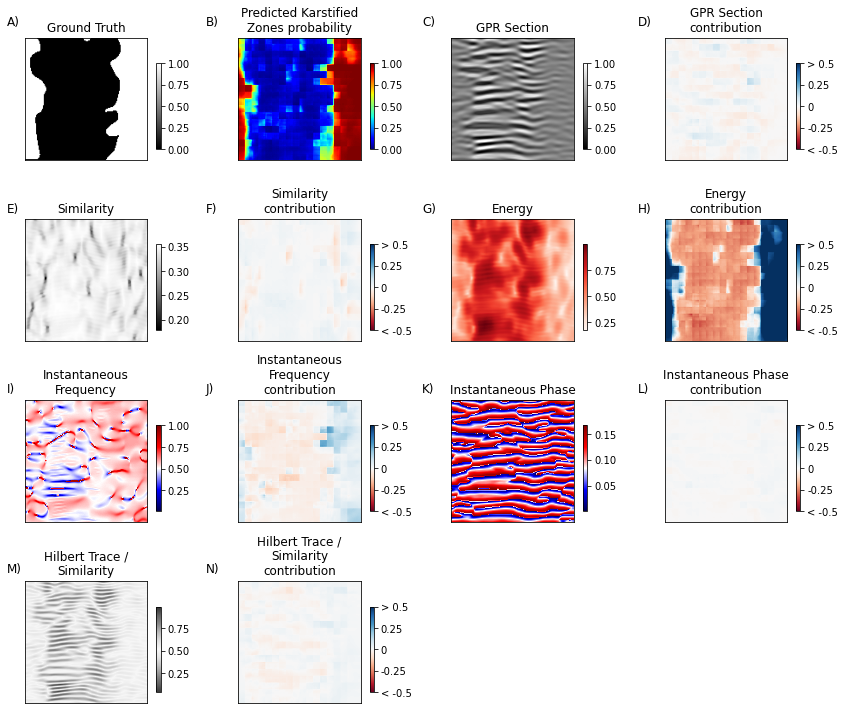

In [74]:
figure_with_attributes(background_type = 'not_karstified',
                       current = 'c',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

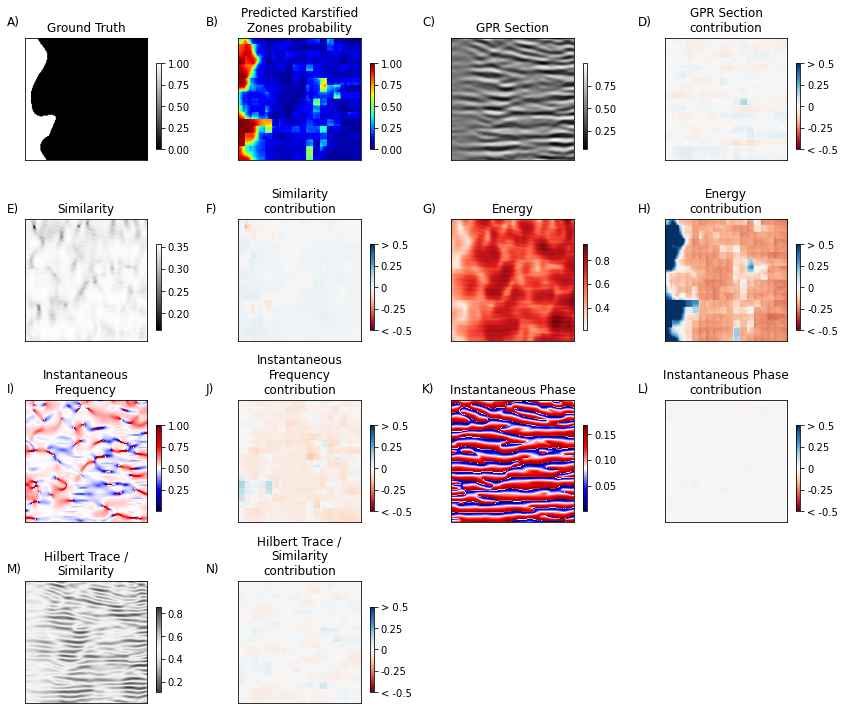

In [75]:
figure_with_attributes(background_type = 'not_karstified',
                       current = 'd',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

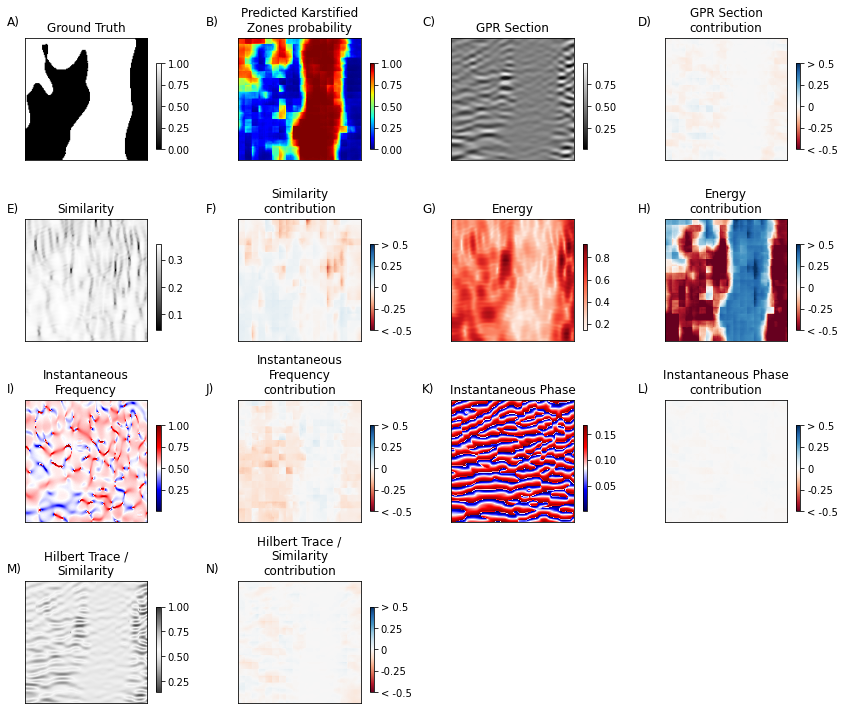

In [76]:
figure_with_attributes(background_type = 'balanced',
                       current = 'a',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

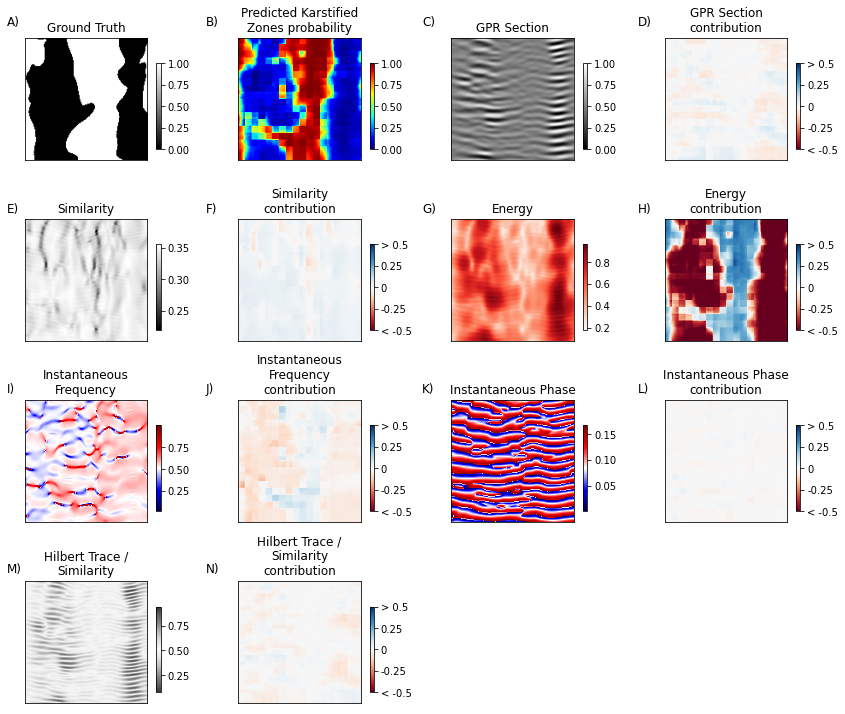

In [77]:
figure_with_attributes(background_type = 'balanced',
                       current = 'b',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

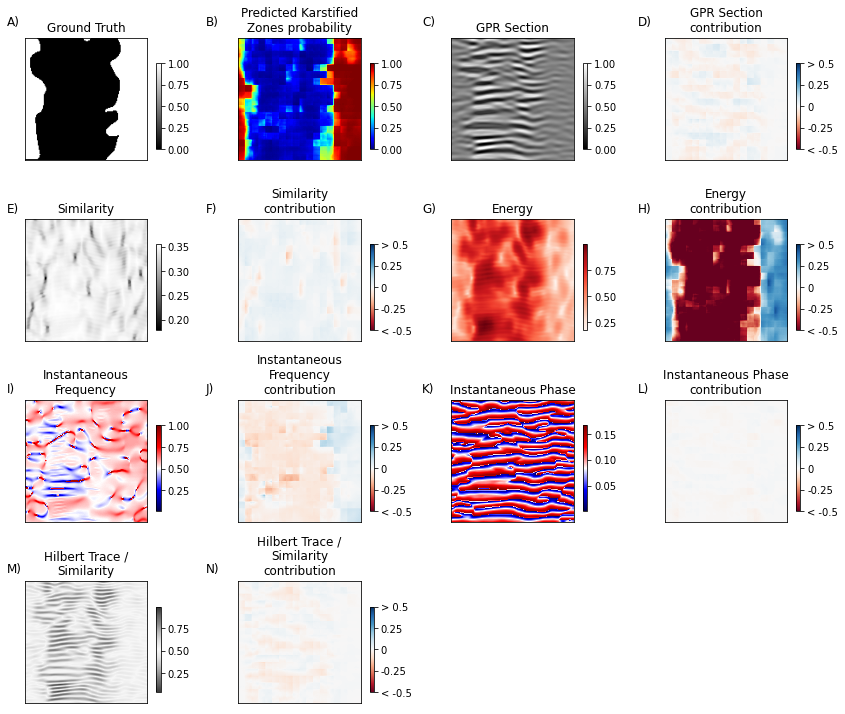

In [78]:
figure_with_attributes(background_type = 'balanced',
                       current = 'c',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

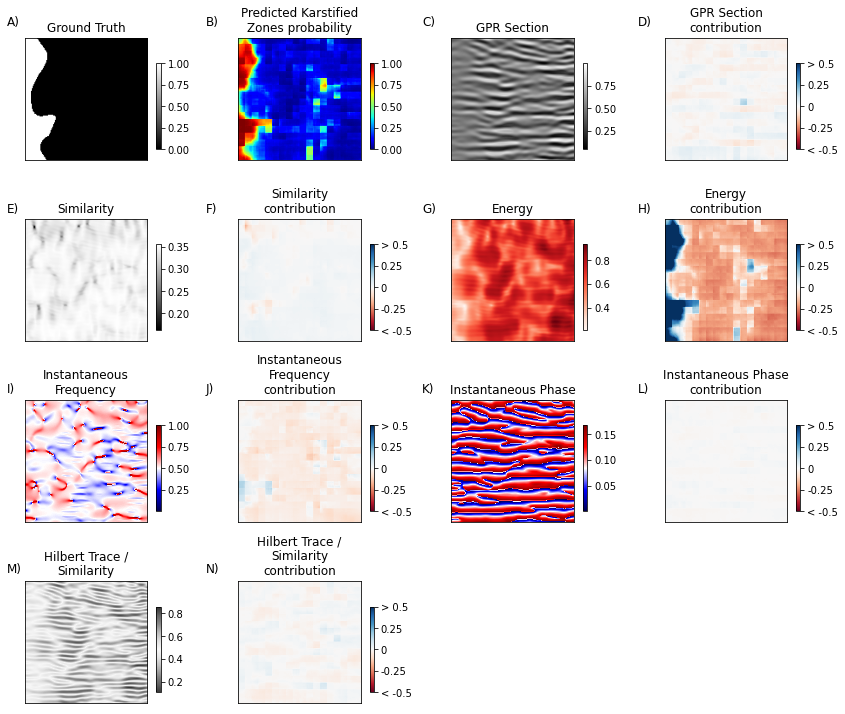

In [79]:
figure_with_attributes(background_type = 'balanced',
                       current = 'd',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

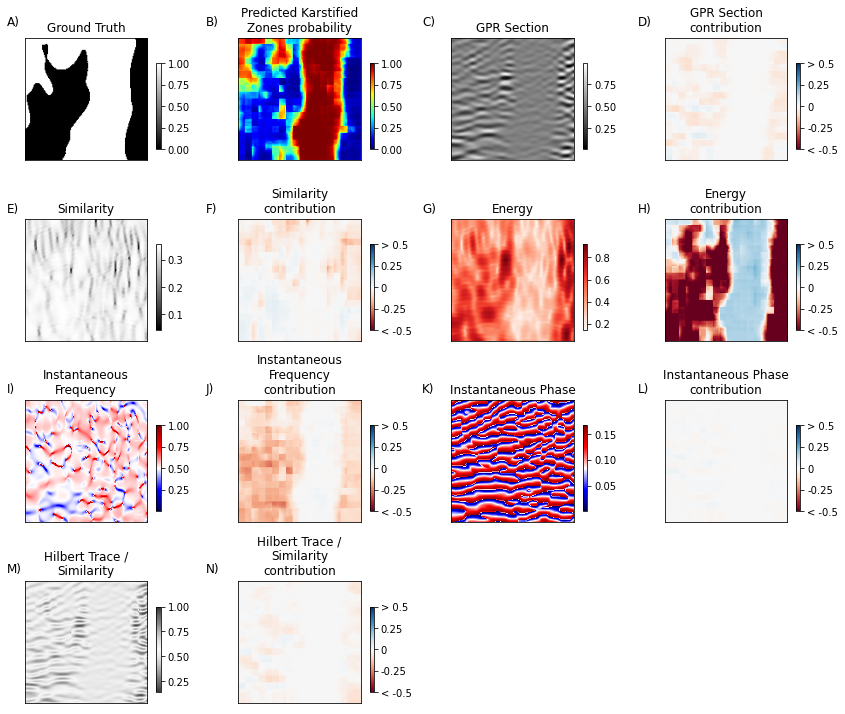

In [80]:
figure_with_attributes(background_type = 'karstified',
                       current = 'a',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

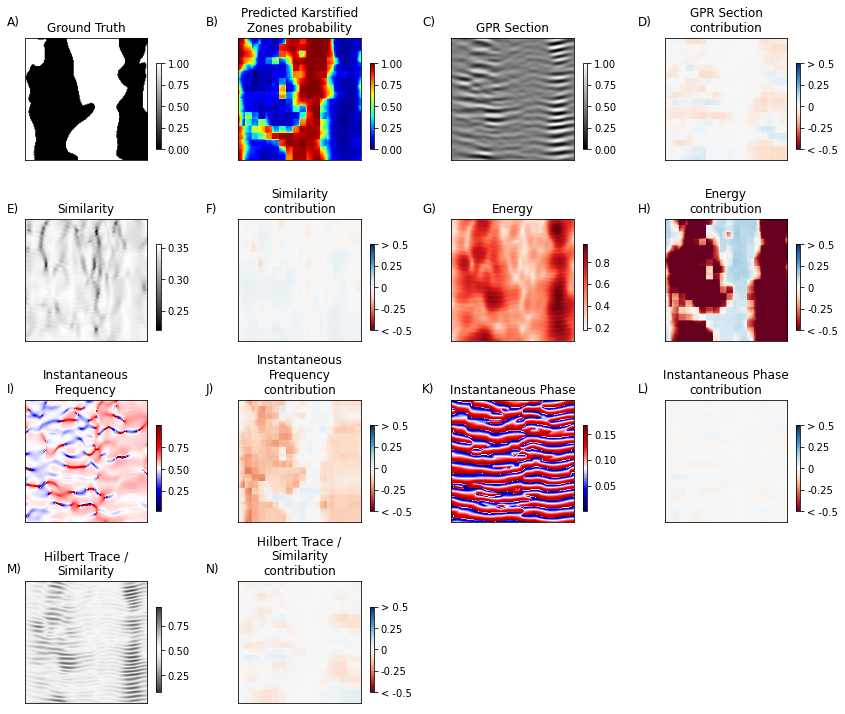

In [81]:
figure_with_attributes(background_type = 'karstified',
                       current = 'b',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

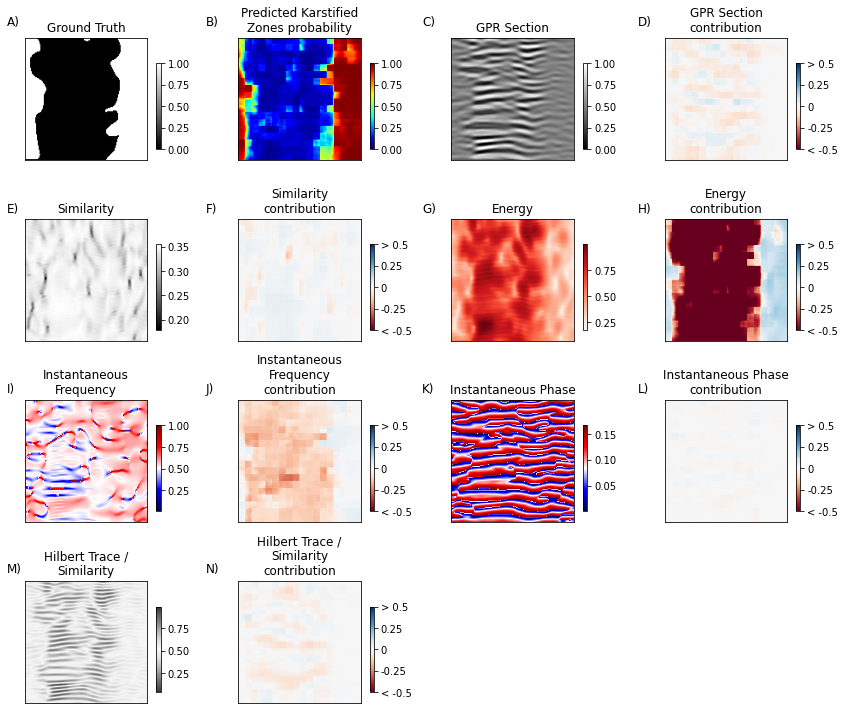

In [82]:
figure_with_attributes(background_type = 'karstified',
                       current = 'c',
                          vmin = vmin,
                          vmax = vmax)

<ipython-input-70-2e0ca6659007>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:209: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
<ipython-input-70-2e0ca6659007>:243: UserWarning: FixedFormatter should only be used together wi

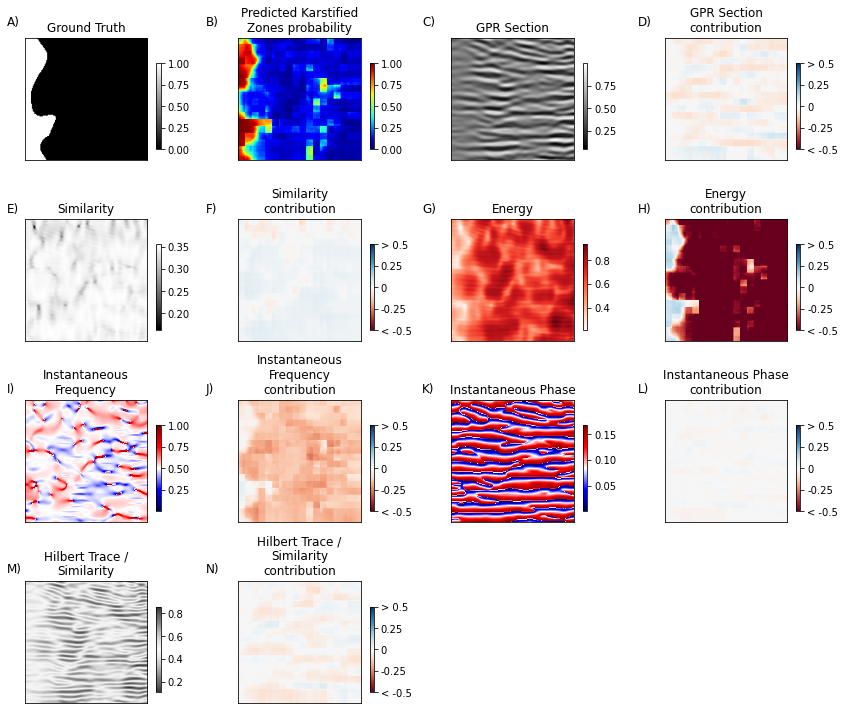

In [83]:
figure_with_attributes(background_type = 'karstified',
                       current = 'd',
                       vmin = vmin,
                       vmax = vmax)

## Models with only one feature

<ipython-input-84-fff66b0b184d>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])


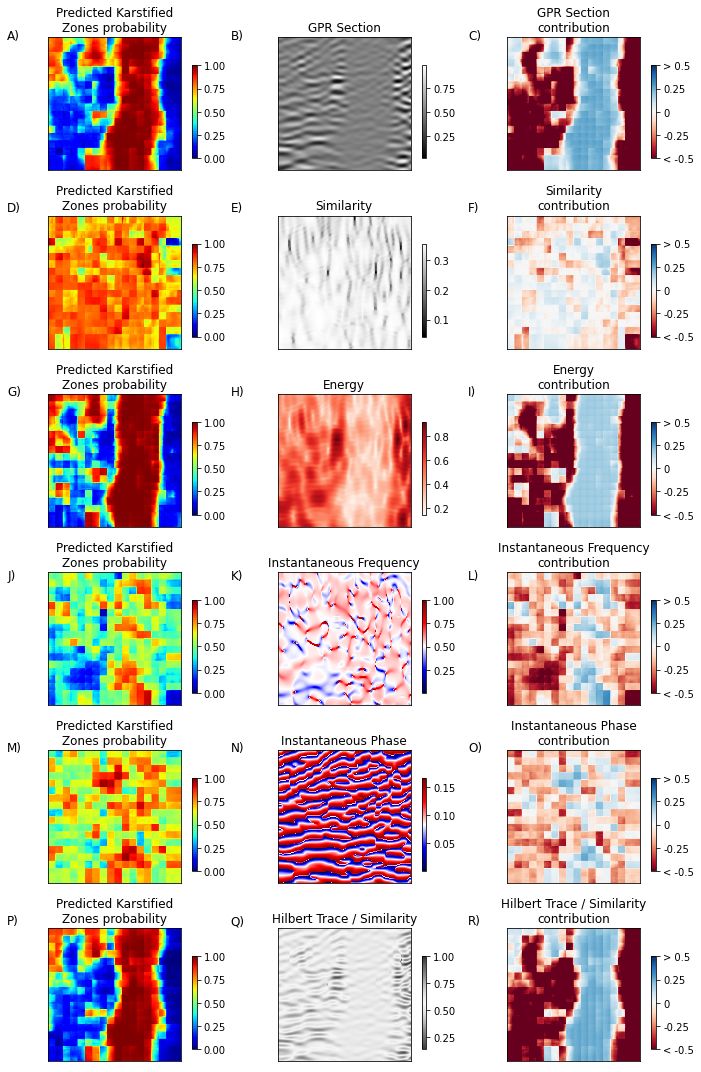

In [84]:
selected_features = [0, 1, 2, 3, 4, 5] 

current = 'a'
background_type = 'balanced'

channel_list = ['GPR Section', 'Similarity', 'Energy', 'Instantaneous Frequency', 'Instantaneous Phase', 'Hilbert Trace / Similarity']
y_test_section_2 = np.load(data_path + f'y_test_area_{current}.npy').astype(np.float16)

fig, ax = plt.subplots(6, 3, figsize = (10, 15))
n = 0
for i in range(0, 6):

  feature = selected_features[n]

  approximation_full = np.load(data_path + f'approximation_full_{current}-{background_type}_only{feature}.npy')
  channel_contribution_full = np.load(data_path + f'channel_contribution_full_{current}-{background_type}_only{feature}.npy')
  x_predicted_full = np.load(data_path + f'x_predicted_full_{current}-{background_type}_only{feature}.npy')
  expected_value = np.load(data_path + f'expected_value-{background_type}_only{feature}.npy')

  x_test_section_2 = np.load(data_path + f'x_test_area_{current}.npy').astype(np.float16)
  x_test_section_2 = x_test_section_2[..., feature]

  #Previsto
  j = 0
  im = ax[i, j].imshow(x_predicted_full[..., 0], cmap = 'jet', vmin = 0, vmax = 1)
  cbar = fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[i, j].set_title('Predicted Karstified\nZones probability')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])
  #Feature
  j = 1
  im = ax[i, j].imshow(x_test_section_2.astype(np.float32),
                       cmap = cmap_list[n],
                      #vmin = 0,
                      #vmax = 1
                      )
  cbar = fig.colorbar(im, ax=ax[i, j],
                  #location = 'bottom',
                  anchor=(0, 0.3),
                  shrink=0.7,
                  use_gridspec=True)
  ax[i, j].set_title(f'{channel_list[n]}')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])
  #Explicação
  j = 2
  im = ax[i, j].imshow(channel_contribution_full[..., 0],
                        cmap = cmap_reversed,
                        vmin = -0.5, vmax = 0.5,
                        #alpha = 0.3
                        )

  cbar = fig.colorbar(im, ax=ax[i, j],
                #location = 'bottom',
                anchor=(0, 0.3),
                shrink=0.7,
                use_gridspec=True)
  cbar.ax.set_yticklabels(['< -0.5', '-0.25', '0', '0.25', '> 0.5'])
  # cbar.ax.set_yticklabels(['< -0.5', '0', '> 0.5'])
  ax[i, j].set_title(f'{channel_list[n]}\ncontribution')
  ax[i, j].set_xticks([])
  ax[i, j].set_yticks([])

  n += 1
size = 12
plt.figtext(0.02, 0.96, 'A)', fontsize=size)
plt.figtext(0.33, 0.96, 'B)', fontsize=size)
plt.figtext(0.66, 0.96, 'C)', fontsize=size)

plt.figtext(0.02, 0.80, 'D)', fontsize=size)
plt.figtext(0.33, 0.80, 'E)', fontsize=size)
plt.figtext(0.66, 0.80, 'F)', fontsize=size)

plt.figtext(0.02, 0.63, 'G)', fontsize=size)
plt.figtext(0.33, 0.63, 'H)', fontsize=size)
plt.figtext(0.66, 0.63, 'I)', fontsize=size)

plt.figtext(0.02, 0.46, 'J)', fontsize=size)
plt.figtext(0.33, 0.46, 'K)', fontsize=size)
plt.figtext(0.66, 0.46, 'L)', fontsize=size)

plt.figtext(0.02, 0.30, 'M)', fontsize=size)
plt.figtext(0.33, 0.30, 'N)', fontsize=size)
plt.figtext(0.66, 0.30, 'O)', fontsize=size)

plt.figtext(0.02, 0.14, 'P)', fontsize=size)
plt.figtext(0.33, 0.14, 'Q)', fontsize=size)
plt.figtext(0.66, 0.14, 'R)', fontsize=size)

fig.tight_layout()
output_path = '../xai/figures/'
fig.savefig(f'{output_path}allattributes-{current}.png', dpi = 300)